# Homework 2 - Berkeley STAT 157

Handout 1/29/2019, due 2/5/2019 by 4pm in Git by committing to your repository.

In [1]:
from mxnet import nd, autograd, gluon
%matplotlib inline
from matplotlib import pyplot as plt

# 1. Multinomial Sampling

Implement a sampler from a discrete distribution from scratch, mimicking the function `mxnet.ndarray.random.multinomial`. Its arguments should be a vector of probabilities $p$. You can assume that the probabilities are normalized, i.e. tha they sum up to $1$. Make the call signature as follows:

```
samples = sampler(probs, shape) 

probs   : An ndarray vector of size n of nonnegative numbers summing up to 1
shape   : A list of dimensions for the output
samples : Samples from probs with shape matching shape
```

Hints:

1. Use `mxnet.ndarray.random.uniform` to get a sample from $U[0,1]$.
1. You can simplify things for `probs` by computing the cumulative sum over `probs`.

In [2]:
def sampler(probs, shape):
    ## Add your codes here
    n = len(probs)
    s = nd.zeros(shape).size
    temp = nd.zeros(s)
    ps = nd.random.uniform(0, 1, shape=s)
    for i in range(s):
        p = ps[i]
        v = 0
        j = 0
        for prob in probs:
            v += prob
            if p <= v:
                temp[i] = j
                break
            j += 1
    return temp.reshape(shape)

# a simple test
sampler(nd.array([0.2, 0.3, 0.5]), (2,3))



[[2. 2. 2.]
 [2. 2. 2.]]
<NDArray 2x3 @cpu(0)>

# 2. Central Limit Theorem

Let's explore the Central Limit Theorem when applied to text processing. 

* Download [https://www.gutenberg.org/ebooks/84](https://www.gutenberg.org/files/84/84-0.txt) from Project Gutenberg 
* Remove punctuation, uppercase / lowercase, and split the text up into individual tokens (words).
* For the words `a`, `and`, `the`, `i`, `is` compute their respective counts as the book progresses, i.e. 
    $$n_\mathrm{the}[i] = \sum_{j = 1}^i \{w_j = \mathrm{the}\}$$
* Plot the proportions $n_\mathrm{word}[i] / i$ over the document in one plot.
* Find an envelope of the shape $O(1/\sqrt{i})$ for each of these five words. (Hint, check the last page of the [sampling notebook](http://courses.d2l.ai/berkeley-stat-157/slides/1_24/sampling.pdf))
* Why can we **not** apply the Central Limit Theorem directly? 
* How would we have to change the text for it to apply? 
* Why does it still work quite well?

In [50]:
filename = gluon.utils.download('https://www.gutenberg.org/files/84/84-0.txt')
with open(filename) as f:
    book = f.read()
print(book[0:100])

## Add your codes here

﻿
Project Gutenberg's Frankenstein, by Mary Wollstonecraft (Godwin) Shelley

This eBook is for the u


In [51]:
import re
import string
import numpy as np
tokens = '\n'.join(book.split(' ')).split('\n')
tokens = list(map(\
             lambda x: ''.join(c for c in x if c not in string.punctuation).lower()\
               , tokens))
tokens = list(filter(lambda x: x is not '', tokens))
tokens[:6]
tokens = np.array(tokens)

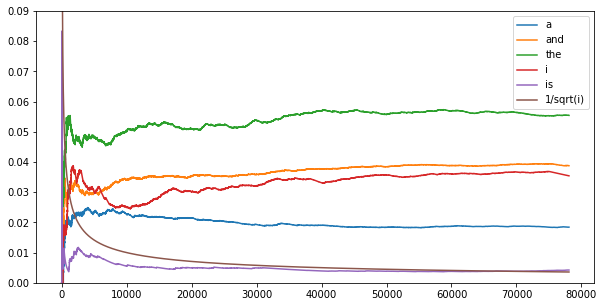

In [52]:
plt.figure(figsize=(10,5))
words = ['a', 'and', 'the', 'i', 'is']
for word in words:
    x = 1*(tokens == word)
    y = np.arange(1, len(x)+1)
    z = np.cumsum(x)/y
    plt.plot(y,z)
x = 1/np.sqrt(y)
plt.plot(y,x)
plt.ylim(0, .09)

plt.legend(words + ['1/sqrt(i)'])
plt.show()

* Why can we **not** apply the Central Limit Theorem directly?

**The subsequent proportions are not independant of each other. For example, the next value has either the same number or the same number + 1 sucesses as last value.**

* How would we have to change the text for it to apply? 

**Have each x value be an independant sample from the corpus of words where we measure the proportion of a certain word**

* Why does it still work quite well?

**We converge to the actual probability since the first half of the corpus proportion is a really good estimate for the second half of the corpus.**

## 3. Denominator-layout notation

We used the numerator-layout notation for matrix calculus in class, now let's examine the denominator-layout notation.

Given $x, y\in\mathbb R$, $\mathbf x\in\mathbb R^n$ and $\mathbf y \in \mathbb R^m$, we have

$$
\frac{\partial y}{\partial \mathbf{x}}=\begin{bmatrix}
\frac{\partial y}{\partial x_1}\\
\frac{\partial y}{\partial x_2}\\
\vdots\\
\frac{\partial y}{\partial x_n}
\end{bmatrix},\quad 
\frac{\partial \mathbf y}{\partial {x}}=\begin{bmatrix}
\frac{\partial y_1}{\partial x}, 
\frac{\partial y_2}{\partial x}, 
\ldots,
\frac{\partial y_m}{\partial x}
\end{bmatrix}
$$

and 

$$
\frac{\partial \mathbf y}{\partial \mathbf{x}}
=\begin{bmatrix}
\frac{\partial \mathbf y}{\partial {x_1}}\\
\frac{\partial \mathbf y}{\partial {x_2}}\\
\vdots\\
\frac{\partial \mathbf y}{\partial {x_3}}\\
\end{bmatrix}
=\begin{bmatrix}
\frac{\partial y_1}{\partial x_1}, 
\frac{\partial y_2}{\partial x_1},
\ldots,
\frac{\partial y_m}{\partial x_1}
\\ 
\frac{\partial y_1}{\partial x_2},
\frac{\partial y_2}{\partial x_2},
\ldots,
\frac{\partial y_m}{\partial x_2}\\ 
\vdots\\
\frac{\partial y_1}{\partial x_n},
\frac{\partial y_2}{\partial x_n},
\ldots,
\frac{\partial y_m}{\partial x_n}
\end{bmatrix}
$$

Questions: 

1. Assume $\mathbf  y = f(\mathbf u)$ and $\mathbf u = g(\mathbf x)$, write down the chain rule for $\frac {\partial\mathbf  y}{\partial\mathbf x}$

$\frac {\partial\mathbf  y}{\partial\mathbf x}$ = $\frac {\partial\mathbf  y}{\partial\mathbf u}*\frac {\partial\mathbf  u}{\partial\mathbf x}$

2. Given $\mathbf X \in \mathbb R^{m\times n},\ \mathbf w \in \mathbb R^n, \ \mathbf y \in \mathbb R^m$, assume $z = \| \mathbf X \mathbf w - \mathbf y\|^2$, compute $\frac{\partial z}{\partial\mathbf w}$.

$\frac{\partial z}{\partial\mathbf w} = 2 * \mathbf X^T(\mathbf X \mathbf w - \mathbf y) $


## 4. Numerical Precision

Given scalars `x` and `y`, implement the following `log_exp` function such that it returns 
$$-\log\left(\frac{e^x}{e^x+e^y}\right)$$.

In [80]:
def log_exp(x, y):
    return -1*nd.log(nd.exp(x)/(nd.exp(x)+nd.exp(y)))

Test your codes with normal inputs:

In [118]:
x, y = nd.array([2]), nd.array([3])
z = log_exp(x, y)
z


[1.3132617]
<NDArray 1 @cpu(0)>

Now implement a function to compute $\partial z/\partial x$ and $\partial z/\partial y$ with `autograd`

In [119]:
def grad(forward_func, x, y): 
    x.attach_grad()
    y.attach_grad()
    with autograd.record():
        z = forward_func(x, y)
    z.backward()
    print('x.grad =', x.grad)
    print('y.grad =', y.grad)

Test your codes, it should print the results nicely. 

In [122]:
grad(log_exp, x, y)

x.grad = 
[-0.7310586]
<NDArray 1 @cpu(0)>
y.grad = 
[0.7310586]
<NDArray 1 @cpu(0)>


But now let's try some "hard" inputs

In [123]:
x, y = nd.array([50]), nd.array([100])
grad(log_exp, x, y)


x.grad = 
[nan]
<NDArray 1 @cpu(0)>
y.grad = 
[nan]
<NDArray 1 @cpu(0)>


Does your code return correct results? If not, try to understand the reason. (Hint, evaluate `exp(100)`). Now develop a new function `stable_log_exp` that is identical to `log_exp` in math, but returns a more numerical stable result.

In [124]:
def stable_log_exp(x, y):
    b = max(x, y)
    return -x + b + nd.log(nd.exp(x - b) + nd.exp(y - b))

grad(stable_log_exp, x, y)

x.grad = 
[-1.]
<NDArray 1 @cpu(0)>
y.grad = 
[1.]
<NDArray 1 @cpu(0)>


In [126]:
x, y = nd.array([2]), nd.array([3])
z = stable_log_exp(x, y)
z


[1.3132616]
<NDArray 1 @cpu(0)>

In [127]:
grad(stable_log_exp, x, y)

x.grad = 
[-0.7310586]
<NDArray 1 @cpu(0)>
y.grad = 
[0.7310586]
<NDArray 1 @cpu(0)>


In [128]:
x, y = nd.array([50]), nd.array([100])
grad(stable_log_exp, x, y)


x.grad = 
[-1.]
<NDArray 1 @cpu(0)>
y.grad = 
[1.]
<NDArray 1 @cpu(0)>
